## Практическая работа №11

### Подключение библиотек

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

### 1. Загрузка данных

In [2]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 2. Провести кластеризацию при помощи k-means

In [3]:
models = []
score1 = []
score2 = []

for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(df)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(df, model.labels_))

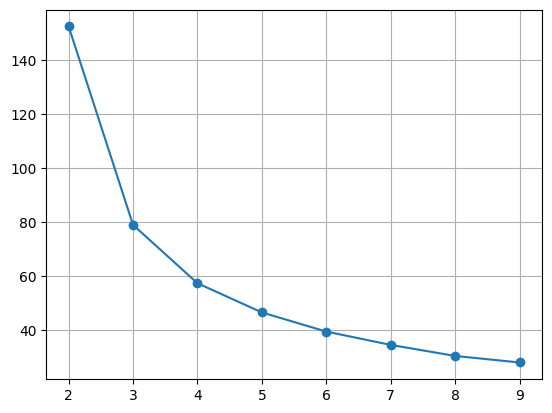

In [4]:
plt.grid()
plt.plot(np.arange(2, 10), score1, marker= 'o')
plt.show()

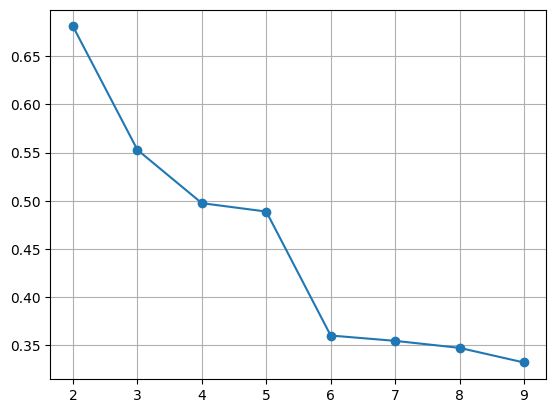

In [5]:
plt.grid()
plt.plot(np.arange(2, 10), score2, marker= 'o')
plt.show()

In [6]:
time_start = time.time()

model1 = KMeans(n_clusters=3, random_state=123, init='k-means++')
model1.fit(df)

time_end = time.time() - time_start

labels = model1.labels_
df['Claster'] = labels

print('\n {:.4f} sec.'.format(time_end))


 0.0438 sec.


In [7]:
fig = go.Figure(data=[go.Scatter3d(x=df['sepal length (cm)'], y=df['sepal width (cm)'], z=df['petal length (cm)'], mode='markers', marker_color=df['Claster'], marker_size=4)])
fig.show()

### 3. Иерархическая кластеризация

In [8]:
time_start = time.time()

model2 = AgglomerativeClustering(3, compute_distances=True)
clastering = model2.fit(df)

time_end = time.time() - time_start

df['Claster'] = clastering.labels_

print('\n {:.4f} sec.'.format(time_end))


 0.0083 sec.


In [9]:
fig = go.Figure(data=[go.Scatter3d(x=df['sepal length (cm)'], y=df['sepal width (cm)'], z=df['petal length (cm)'], mode='markers', marker_color=df['Claster'], marker_size=4)])
fig.show()

### 4. DBSCAN 

In [10]:
time_start = time.time()

model3 = DBSCAN(eps=1, min_samples=6).fit(df)

time_end = time.time() - time_start

df['Claster'] = model3.labels_

print('\n {:.4f} sec.'.format(time_end))


 0.0051 sec.


In [11]:
fig = go.Figure(data=[go.Scatter3d(x=df['sepal length (cm)'], y=df['sepal width (cm)'], z=df['petal length (cm)'], mode='markers', marker_color=df['Claster'], marker_size=4)])
fig.show()

### Сравнение скорости работы алгоритмов

| Алгоритм | Время (сек.) |
| --- | --- |
| k-means | 0.1940 |
| Иерарх. класт. | 0.0116 |
| DBSCAN | 0.1911 |